In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
import os
import kagglehub

# Download the dataset (it will go to cache)
path = kagglehub.dataset_download("berkerisen/wind-turbine-scada-dataset")

print("Dataset downloaded to:", path)

# List files in the directory
files = os.listdir(path)
print("Files in dataset:", files)

# Read the CSV file
csv_files = [f for f in files if f.endswith('.csv')]

if csv_files:
    csv_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(csv_path)
    print(f"\nLoaded: {csv_files[0]}")

Dataset downloaded to: C:\Users\User\.cache\kagglehub\datasets\berkerisen\wind-turbine-scada-dataset\versions\3
Files in dataset: ['T1.csv']

Loaded: T1.csv


In [3]:
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


# Descriptive Statistics

In [4]:
df = df.set_index('Date/Time')
df.index = pd.to_datetime(df.index,dayfirst=True, errors='coerce')
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


# Time Plot

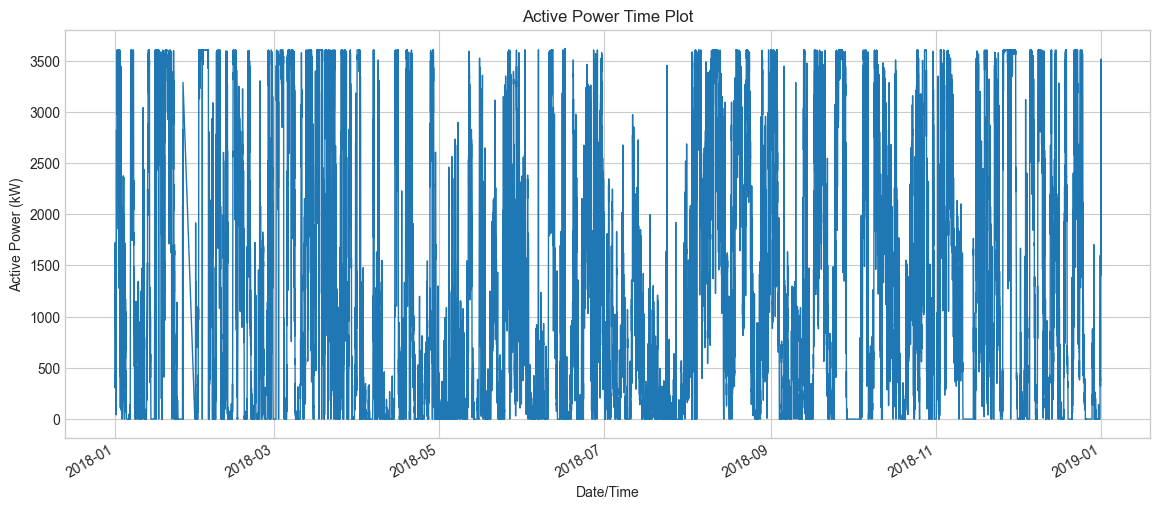

In [10]:
plt.style.use("seaborn-v0_8-whitegrid")

plt.figure(figsize=(14,6))
df['LV ActivePower (kW)'].plot(title='Active Power Time Plot', linewidth=1)
plt.xlabel('Date/Time')
plt.ylabel('Active Power (kW)')
plt.show()

## Key Insights
* The pattern of the data shows that the active power exhibits flunctuation over the year ...

#TODO: Elaborate key insights

# Seasonal Plots

In [15]:
df['month'] = df.index.month
df.reset_index(inplace=True)
df['week'] = df['Date/Time'].dt.isocalendar().week
df['hour'] = df['Date/Time'].dt.hour
df.set_index('Date/Time', inplace=True)
df

AttributeError: 'RangeIndex' object has no attribute 'month'